# Lineare Regression und Trennbarkeit: Kilometer vs. Meilen, Marienkäfer vs. Heuschrecken

In diesem Notebook schauen wir uns an, was **lineare Regression** und **linear trennbar** bedeutet.
Dazu verwenden wir zwei einfache Beispiele:

- Kilometer und Meilen (von gestern)

- Marienkäfer und Heuschrecken:
    - Merkmale: **Länge** und **Breite** eines Insekts
    - Klasse 1: Marienkäfer (etwa gleich lang wie breit)
    - Klasse 2: Heuschrecken (deutlich länger als breit)

Wir werden:
1. Nur die Marienkäfer im Koordinatensystem anzeigen
2. Nur die Heuschrecken anzeigen
3. Beide gemeinsam anzeigen
4. Eine **Gerade** einzeichnen, die beide Klassen trennt
5. Eine **Gerade** automatisch durch den Computer berechnen lassen


## 0. Kilometer vs. Meilen
Die nachfolgende Zelle generiert eine kleine Animation um zu sehen, wie sich eine lineare Regression abhängig von c darstellt.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

true_c = 0.621371   # echter Umrechnungsfaktor km -> miles
km = np.linspace(0, 100, 20)
miles_data = true_c * km

x_vals = np.linspace(km.min(), km.max(), 200)

num_frames = 50
c_history = np.random.uniform(0.3, 1.0, size=num_frames)


fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(km, miles_data, label="km → miles", color="blue")

(line,) = ax.plot([], [], linewidth=2, label="miles = km * c")

ax.set_xlabel("Kilometer")
ax.set_ylabel("Meilen")
ax.set_title("Lernen des Faktors c in miles = km * c")
ax.grid(True)
ax.legend(loc="upper left")

ax.set_xlim(km.min(), km.max())
ax.set_ylim(0, miles_data.max() * 1.2)


def init():
    line.set_data([], [])
    return (line,)

def update(frame):
    c = c_history[frame]
    y_vals = c * x_vals

    line.set_data(x_vals, y_vals)

    miles_pred = c * km
    mse = np.mean((miles_pred - miles_data) ** 2)

    ax.set_title(
        f"Lernen des Faktors c – Frame {frame+1}/{len(c_history)}\n"
        f"c = {c:.4f}, MSE = {mse:.4f}"
    )

    return (line,)

anim = animation.FuncAnimation(
    fig,
    update,
    init_func=init,
    frames=len(c_history),
    interval=400,
    blit=True
)

plt.close(fig)

# Animation anzeigen
HTML(anim.to_jshtml())


In [11]:
np.random.seed(42)  # für reproduzierbare Ergebnisse

# Wir erzeugen synthetische Daten:
# Marienkäfer: Länge und Breite ungefähr gleich (z.B. 5.5–6.5 mm)
# Heuschrecken: Länge deutlich größer als Breite (z.B. Länge 7.5–8.5, Breite 3.5–4.5)

n_ladybugs = 40
n_grasshoppers = 40

lady_length = np.random.uniform(5.5, 6.5, n_ladybugs)
lady_width  = np.random.uniform(5.5, 6.5, n_ladybugs)

grass_length = np.random.uniform(7.5, 8.5, n_grasshoppers)
grass_width  = np.random.uniform(3.5, 4.5, n_grasshoppers)

## 1. Nur Marienkäfer im Koordinatensystem

Wir tragen Länge (x-Achse) und Breite (y-Achse) der Marienkäfer ein.

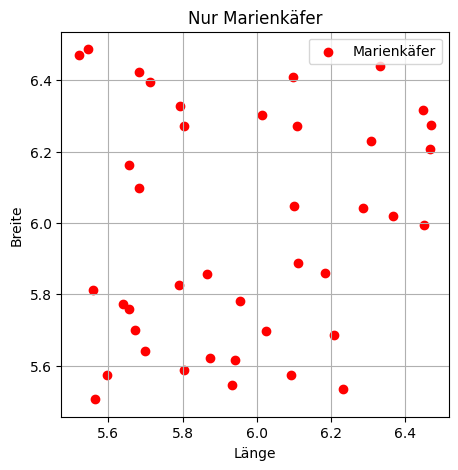

In [12]:
plt.figure(figsize=(5, 5))
plt.scatter(lady_length, lady_width, color='red', label='Marienkäfer')
plt.xlabel('Länge')
plt.ylabel('Breite')
plt.title('Nur Marienkäfer')
plt.legend()
plt.grid(True)
plt.show()

## 2. Nur Heuschrecken im Koordinatensystem

Jetzt tragen wir nur die Heuschrecken ein.

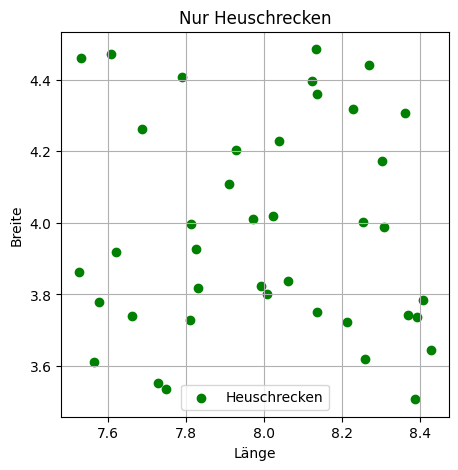

In [13]:
plt.figure(figsize=(5, 5))
plt.scatter(grass_length, grass_width, color='green', label='Heuschrecken')
plt.xlabel('Länge')
plt.ylabel('Breite')
plt.title('Nur Heuschrecken')
plt.legend()
plt.grid(True)
plt.show()

## 3. Beide Klassen gemeinsam

Nun zeichnen wir beide Insekttypen in dasselbe Koordinatensystem ein.

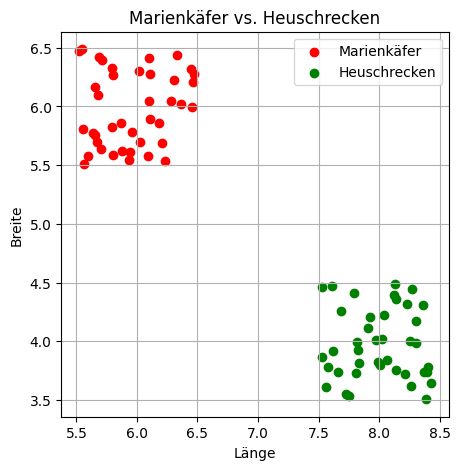

In [14]:
plt.figure(figsize=(5, 5))
plt.scatter(lady_length, lady_width, color='red', label='Marienkäfer')
plt.scatter(grass_length, grass_width, color='green', label='Heuschrecken')
plt.xlabel('Länge')
plt.ylabel('Breite')
plt.title('Marienkäfer vs. Heuschrecken')
plt.legend()
plt.grid(True)
plt.show()

## 4. Lineare Trennbarkeit mit einer Geraden

Eine funktionierende Trennlinie (in diesem synthetischen Beispiel) ist:

**y = x − 2**

Intuition:
- Marienkäfer (≈ Länge 6, Breite 6): 6 ≥ 6−2=4 → liegen **über** der Linie  
- Heuschrecken (≈ Länge 8, Breite 4): 4 ≤ 8−2=6 → liegen **unter** der Linie

Damit kann ein einfacher **linearer Klassifikator** die beiden Klassen trennen.


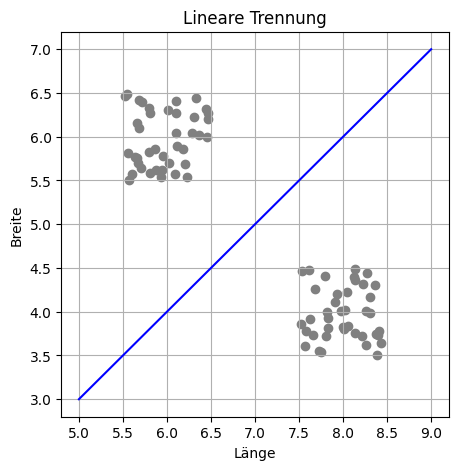

In [15]:
# Gerade definieren: y = -x + 11
x_vals = np.linspace(5, 9, 100)
y_vals = x_vals - 2

plt.figure(figsize=(5, 5))
plt.scatter(lady_length, lady_width, color='gray')
plt.scatter(grass_length, grass_width, color='gray')
plt.plot(x_vals, y_vals, color='blue')
plt.xlabel('Länge')
plt.ylabel('Breite')
plt.title('Lineare Trennung')
plt.grid(True)
plt.show()

In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Daten vorbereiten
X = np.vstack([
    np.column_stack([lady_length, lady_width]),          # Marienkäfer
    np.column_stack([grass_length, grass_width])         # Heuschrecken
])
y = np.hstack([
    np.zeros_like(lady_length),    # 0 = Marienkäfer
    np.ones_like(grass_length)     # 1 = Heuschrecken
])

# Lineares Modell mit SGD (logistische Regression)
clf = SGDClassifier(
    loss="log_loss",          # logistische Regression
    learning_rate="constant",
    eta0=0.02,
    max_iter=1,
    tol=None,
    random_state=42
)

n_epochs = 25
weights_history = []
bias_history = []
loss_history = []
acc_history = []

for epoch in range(n_epochs):
    # ein Trainingsdurchlauf (ein SGD-Schritt über alle Daten)
    clf.partial_fit(X, y, classes=np.array([0, 1]))
    
    # Gewichte speichern (für die Linien-Animation)
    w1, w2 = clf.coef_[0]
    b = clf.intercept_[0]
    weights_history.append((w1, w2))
    bias_history.append(b)
    
    # Vorhersagen für alle Punkte
    y_proba = clf.predict_proba(X)[:, 1]   # Wahrscheinlichkeit für Klasse 1 (Heuschrecke)
    y_pred  = clf.predict(X)
    
    # Log-Loss (Fehlermaß der logistischen Regression)
    loss = log_loss(y, y_proba)
    loss_history.append(loss)
    
    # Accuracy (Anteil korrekt klassifizierter Punkte)
    acc = (y_pred == y).mean()
    acc_history.append(acc)

print("Anzahl gespeicherter Schritte:", len(weights_history))

Anzahl gespeicherter Schritte: 25


In [17]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Bereich für x-Werte der Linie
x_vals = np.linspace(5, 9, 100)

# Figur und Achse vorbereiten
fig, ax = plt.subplots(figsize=(6, 6))

# Datenpunkte einmalig zeichnen
ax.scatter(lady_length, lady_width, label="Marienkäfer", color="red")
ax.scatter(grass_length, grass_width, label="Heuschrecken", color="green")

# Leere Linie, die wir in der Animation updaten
(line,) = ax.plot([], [], linewidth=2, label="aktuelle Trennlinie")

ax.set_xlabel("Länge")
ax.set_ylabel("Breite")
ax.set_title("Lernen der Trennlinie (Epoche für Epoche)")
ax.grid(True)
ax.legend(loc="upper left")

# Achsenlimits festsetzen, damit der Bildausschnitt gleich bleibt
ax.set_xlim(5, 9)
ax.set_ylim(3, 7)

def init():
    """Initialisierung der Linie (noch nichts gezeichnet)."""
    line.set_data([], [])
    return (line,)

def update(frame):
    """Update-Funktion für Frame 'frame' (Epoche)."""
    w1, w2 = weights_history[frame]
    b = bias_history[frame]
    # Geraden-Gleichung: w1*x + w2*y + b = 0 -> y = -(w1/w2)*x - b/w2
    y_vals = -(w1 / w2) * x_vals - b / w2

    line.set_data(x_vals, y_vals)
    ax.set_title(f'Lernen der Trennlinie – Epoche {frame+1}')
    return (line,)

# Animation erzeugen
anim = animation.FuncAnimation(
    fig,
    update,
    init_func=init,
    frames=len(weights_history),
    interval=500,    # Millisekunden pro Frame
    blit=True
)

plt.close(fig)  # verhindert doppelte statische Ausgabe

# Animation im Notebook anzeigen
HTML(anim.to_jshtml())


In [18]:
np.random.seed(42)

n_ladybugs = 40
n_grasshoppers = 40

# Marienkäfer:
lady_length = np.random.uniform(5.5, 7.5, n_ladybugs)
lady_width  = lady_length + np.random.normal(0, 0.3, n_ladybugs)

# Heuschrecken:
grass_length = np.random.uniform(6.5, 9.0, n_grasshoppers)
grass_width  = 0.5 * grass_length + 1 + np.random.normal(0, 0.3, n_grasshoppers)

# Feature-Matrix & Labels
X = np.vstack([
    np.column_stack([lady_length, lady_width]),
    np.column_stack([grass_length, grass_width])
])
y = np.hstack([
    np.zeros_like(lady_length),    # 0 = Marienkäfer
    np.ones_like(grass_length)     # 1 = Heuschrecke
])

# 2) Lineares Modell mittels SGD
clf = SGDClassifier(
    loss="log_loss",
    learning_rate="constant",
    eta0=0.01,
    max_iter=1,
    tol=None,
    random_state=0
)

n_epochs = 50
weights_history = []
bias_history = []

for epoch in range(n_epochs):
    clf.partial_fit(X, y, classes=np.array([0, 1]))
    w1, w2 = clf.coef_[0]
    b = clf.intercept_[0]
    weights_history.append((w1, w2))
    bias_history.append(b)

print("Gespeicherte Schritte:", len(weights_history))

# 3) Animation der lernenden Trennlinie
x_vals = np.linspace(5.5, 9.0, 100)

fig, ax = plt.subplots(figsize=(6, 6))

# Datenpunkte zeichnen
ax.scatter(lady_length, lady_width, label="Marienkäfer")
ax.scatter(grass_length, grass_width, label="Heuschrecken")

# Leere Linie für Animation
(line,) = ax.plot([], [], linewidth=2, label="aktuelle Trennlinie")

ax.set_xlabel("Länge")
ax.set_ylabel("Breite")
ax.set_title("Lernen der Trennlinie (Epoche für Epoche)")
ax.grid(True)
ax.legend(loc="upper left")

ax.set_xlim(5.0, 9.5)
ax.set_ylim(3.0, 9.0)

def init():
    line.set_data([], [])
    return (line,)

def update(frame):
    w1, w2 = weights_history[frame]
    b = bias_history[frame]
    if abs(w2) < 1e-6:
        y_vals = np.full_like(x_vals, np.nan)
    else:
        y_vals = -(w1 / w2) * x_vals - b / w2
    line.set_data(x_vals, y_vals)
    ax.set_title(f"Lernen der Trennlinie – Epoche {frame+1}")
    return (line,)

anim = animation.FuncAnimation(
    fig,
    update,
    init_func=init,
    frames=len(weights_history),
    interval=500,
    blit=True
)

plt.close(fig)  # verhindert doppelte Ausgabe

HTML(anim.to_jshtml())


Gespeicherte Schritte: 50
